# Customer Churn Prediction

Notebook ini berisi pembuatan dan komparasi model Machine Learning Klasifikasi dari Customer Churn dataset.

Dibuat oleh :
- Faisal Ahmad Gifari - 149368779101-841




Datasets didapatkan oleh Facilitator Binar Academy

# 1. Import


## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/challenge 2/train.csv')

# 2. Statistical Analysis

## Descriptive Information

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.keys()

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Desciptive Statistics

In [ ]:
print("Data Train = ", train.shape)


Data Train =  (4250, 20)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Data Visualization

In [ ]:
print("Jumlah Churn yang bernilai 'yes' = ",(train["churn"].value_counts()["yes"]))
print("Jumlah Churn yang bernilai 'no' = ",(train["churn"].value_counts()["no"]))


Jumlah Churn yang bernilai 'yes' =  598
Jumlah Churn yang bernilai 'no' =  3652


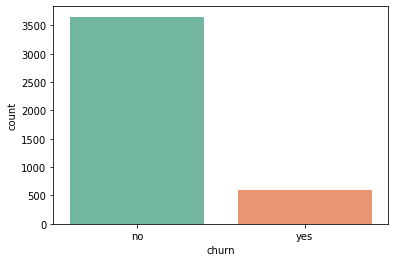

In [ ]:
sns.countplot(x ='churn', 
              data = train, 
              palette = "Set2")
 
plt.show()

In [ ]:
print(train["number_customer_service_calls"].unique())


[1 0 2 3 4 5 7 9 6 8]


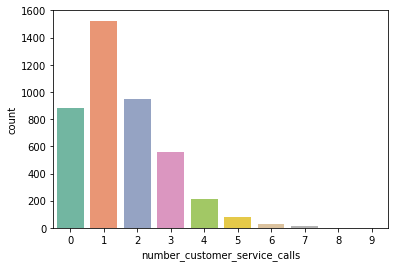

In [ ]:
sns.countplot(x ='number_customer_service_calls', 
              data = train, 
              palette = "Set2")
 
plt.show()

In [ ]:
print("Jumlah international plan yang bernilai 'yes' = ",(train["international_plan"].value_counts()["yes"]))
print("Jumlah international plan yang bernilai 'no' = ",(train["international_plan"].value_counts()["no"]))

Jumlah international plan yang bernilai 'yes' =  396
Jumlah international plan yang bernilai 'no' =  3854


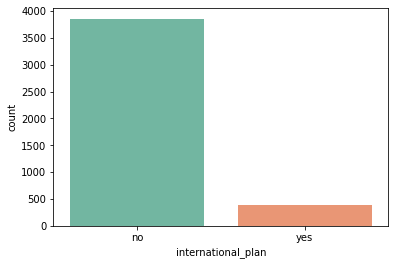

In [ ]:
sns.countplot(x ='international_plan', 
              data = train, 
              palette = "Set2")
 
plt.show()

# 3. Data Pre-processing


## Missing Value


In [ ]:
train.isnull().sum()


state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak terdapat Missing Value, baik pada data train maupun data test

## Outliers

In [ ]:
nvm_upper = train.number_vmail_messages.mean() + 3*train.number_vmail_messages.std()
print(nvm_upper)
nvm_outliers = train[(train.number_vmail_messages>nvm_upper) | (train.number_vmail_messages < 0)]
nvm_outliers

47.95141129567186


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
229,SD,144,area_code_408,no,yes,48,189.8,96,32.27,123.4,67,10.49,214.2,106,9.64,6.5,2,1.76,2,yes
1346,AR,63,area_code_510,no,yes,49,214.9,86,36.53,198.2,89,16.85,170.8,139,7.69,8.2,5,2.21,0,no
2303,WV,137,area_code_510,no,yes,50,186.5,94,31.71,178.0,106,15.13,215.6,100,9.70,12.1,4,3.27,2,no
2443,OR,134,area_code_415,no,yes,50,208.8,130,35.50,132.9,104,11.30,136.7,107,6.15,11.1,4,3.00,2,no
2979,VA,71,area_code_415,no,yes,49,174.0,122,29.58,168.6,85,14.33,132.1,120,5.94,7.8,4,2.11,1,no
3022,FL,133,area_code_408,no,yes,49,229.4,78,39.00,219.5,106,18.66,172.3,115,7.75,12.0,4,3.24,3,no
3828,NV,87,area_code_408,no,yes,48,178.8,91,30.40,246.8,106,20.98,262.4,119,11.81,9.0,8,2.43,1,no
4000,ME,108,area_code_510,no,yes,48,185.6,125,31.55,224.6,125,19.09,284.7,87,12.81,6.9,3,1.86,1,no
4005,UT,118,area_code_408,yes,yes,52,123.7,114,21.03,133.2,137,11.32,191.8,102,8.63,7.9,3,2.13,0,no
4061,NY,102,area_code_408,no,yes,48,134.0,83,22.78,234.3,128,19.92,197.3,107,8.88,7.8,4,2.11,6,yes


In [ ]:
tdm_upper = train.total_day_minutes.mean() + 3*train.total_day_minutes.std()
print(tdm_upper)
tdm_outliers = train[(train.total_day_minutes>tdm_upper) | (train.total_day_minutes < 0)]
tdm_outliers

342.2967199942532


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
827,NY,64,area_code_415,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,yes
2202,OH,115,area_code_510,yes,no,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,yes
3381,NJ,112,area_code_408,no,no,0,351.5,95,59.76,206.8,108,17.58,275.8,146,12.41,11.9,4,3.21,1,yes


In [ ]:
tdc = train.total_day_calls
tdc_upper = tdc.mean() + 3*tdc.std()
print(tdc_upper)
tdc_outliers = train[(tdc > tdc_upper) | (tdc < 0)]
tdc_outliers

159.45974605407588


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
942,MI,91,area_code_415,no,no,0,154.4,165,26.25,168.3,121,14.31,239.9,81,10.80,11.7,4,3.16,5,yes
1235,MT,80,area_code_415,no,no,0,198.1,160,33.68,156.7,87,13.32,182.1,76,8.19,9.3,3,2.51,3,no
3871,NM,42,area_code_415,no,no,0,137.9,160,23.44,234.9,107,19.97,166.6,70,7.50,14.3,3,3.86,5,yes


In [ ]:
tdch = train.total_day_charge
tdch_upper = tdch.mean() + 3*tdch.std()
print(tdch_upper)
tdch_outliers = train[(tdch > tdch_upper) | (tdch < 0)]
tdch_outliers

58.19097045124873


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
827,NY,64,area_code_415,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,yes
2202,OH,115,area_code_510,yes,no,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,yes
3381,NJ,112,area_code_408,no,no,0,351.5,95,59.76,206.8,108,17.58,275.8,146,12.41,11.9,4,3.21,1,yes


In [ ]:
tem = train.total_eve_minutes
tem_upper = tem.mean() + 3*tem.std()
print(tem_upper)
tem_outliers = train[(tem > tem_upper) | (tem < 0)]
tem_outliers

350.9224604337379


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
3873,TX,145,area_code_510,no,no,0,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,6.2,6,1.67,2,no
4157,IN,63,area_code_510,no,no,0,6.6,107,1.12,359.3,142,30.54,252.5,131,11.36,5.6,3,1.51,0,no


In [ ]:
tec = train.total_eve_calls
tec_upper = tec.mean() + 3*tec.std()
print(tec_upper)
tec_outliers = train[(tec > tec_upper) | (tec < 0)]
tec_outliers

159.90224390266337


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
249,FL,127,area_code_415,no,no,0,266.6,106,45.32,264.8,168,22.51,207.2,119,9.32,5.9,2,1.59,1,yes
2728,NY,150,area_code_415,no,yes,35,139.6,72,23.73,332.8,170,28.29,213.8,105,9.62,8.8,2,2.38,2,no
3332,WY,44,area_code_415,no,yes,20,184.8,105,31.42,195.0,169,16.58,130.1,121,5.85,11.6,3,3.13,1,no


In [ ]:
tech = train.total_eve_charge
tech_upper = tech.mean() + 3*tech.std()
print(tech_upper)
tech_outliers = train[(tech > tech_upper) | (tech < 0)]
tech_outliers

29.828647741426842


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
3873,TX,145,area_code_510,no,no,0,158.8,120,27.00,352.1,145,29.93,177.6,140,7.99,6.2,6,1.67,2,no
4157,IN,63,area_code_510,no,no,0,6.6,107,1.12,359.3,142,30.54,252.5,131,11.36,5.6,3,1.51,0,no


In [ ]:
tnm = train.total_night_minutes
tnm_upper = tnm.mean() + 3*tnm.std()
print(tnm_upper)
tnm_outliers = train[(tnm > tnm_upper) | (tnm < 0)]
tnm_outliers

351.5885265768492


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1041,OH,147,area_code_415,yes,yes,24,219.9,118,37.38,208.5,116,17.72,352.5,111,15.86,8.1,4,2.19,3,no
1114,NE,89,area_code_415,no,yes,29,163.5,80,27.80,274.8,136,23.36,381.9,147,17.19,7.5,5,2.03,2,no
1222,ID,55,area_code_510,no,yes,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1,no
1973,AR,153,area_code_408,no,no,0,154.6,56,26.28,263.0,84,22.36,367.7,89,16.55,15.5,2,4.19,1,no
2257,VA,172,area_code_510,no,no,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,no
2590,LA,94,area_code_415,no,no,0,212.1,98,36.06,189.4,89,16.10,352.2,95,15.85,8.4,5,2.27,3,no
2631,GA,73,area_code_408,no,no,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,no
2865,SD,98,area_code_415,no,no,0,307.2,65,52.22,138.6,97,11.78,381.6,99,17.17,10.2,4,2.75,2,yes
3296,NH,163,area_code_415,no,yes,39,268.1,104,45.58,216.6,65,18.41,359.9,118,16.20,11.4,4,3.08,0,no
4015,AR,130,area_code_415,no,no,0,182.1,136,30.96,204.2,99,17.36,355.1,135,15.98,12.0,7,3.24,2,no


In [ ]:
train = train.drop(tnm_outliers.index)

In [ ]:
tnc = train.total_night_calls
tnc_upper = tnc.mean() + 3*tnc.std()
print(tnc_upper)
tnc_outliers = train[(tnc > tnc_upper) | (tnc < 0)]
tnc_outliers

160.0803098359549


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
409,RI,129,area_code_415,no,yes,33,119.6,104,20.33,278.7,88,23.69,263.4,175,11.85,5.9,2,1.59,2,no
2721,ID,103,area_code_415,no,no,0,70.9,134,12.05,134.5,112,11.43,168.8,164,7.60,12.0,6,3.24,2,no
3018,DC,138,area_code_415,no,no,0,149.7,99,25.45,160.0,97,13.60,256.5,161,11.54,9.5,5,2.57,1,no
3292,MA,101,area_code_408,no,no,0,189.0,122,32.13,179.2,91,15.23,186.8,170,8.41,11.1,6,3.00,0,no
3820,VT,115,area_code_415,no,no,0,202.1,95,34.36,231.6,89,19.69,214.6,165,9.66,13.1,7,3.54,1,no


In [ ]:
tnch = train.total_night_charge
tnch_upper = tnch.mean() + 3*tnch.std()
print(tnch_upper)
tnch_outliers = train[(tnch > tnch_upper) | (tnch < 0)]
tnch_outliers

15.72090153528145


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1007,MO,86,area_code_415,no,no,0,83.5,96,14.20,221.1,63,18.79,349.7,75,15.74,12.6,3,3.40,0,no
2333,IN,96,area_code_415,no,yes,23,183.1,88,31.13,147.4,89,12.53,350.2,108,15.76,11.3,7,3.05,1,no


In [ ]:
tim = train.total_intl_minutes
tim_upper = tim.mean() + 3*tim.std()
print(tim_upper)
tim_outliers = train[(tim > tim_upper) | (tim < 0)]
tim_outliers

18.538589315941056


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
96,ME,36,area_code_510,yes,yes,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,yes
261,ID,128,area_code_408,no,no,0,125.2,99,21.28,205.4,107,17.46,254.4,111,11.45,18.9,2,5.10,0,no
3301,KS,104,area_code_408,no,no,0,191.8,105,32.61,148.7,96,12.64,234.8,123,10.57,19.3,4,5.21,1,no
3311,CT,68,area_code_510,yes,no,0,197.7,99,33.61,188.8,106,16.05,254.6,80,11.46,19.2,4,5.18,3,yes
3725,KY,55,area_code_415,no,yes,37,197.5,89,33.58,228.7,141,19.44,313.4,121,14.10,19.7,2,5.32,1,no
4230,KY,145,area_code_408,no,no,0,135.0,122,22.95,206.3,88,17.54,210.4,90,9.47,19.7,4,5.32,0,no


In [ ]:
tic = train.total_intl_calls
tic_upper = tic.mean() + 3*tic.std()
print(tic_upper)
tic_outliers = train[(tic > tic_upper) | (tic < 0)]
tic_outliers

11.820542779459167


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
18,AZ,130,area_code_415,no,no,0,183.0,112,31.11,72.9,99,6.20,181.8,78,8.18,9.5,19,2.57,0,no
32,MD,135,area_code_408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,yes
149,NY,67,area_code_408,no,yes,36,115.6,111,19.65,237.7,94,20.20,169.9,103,7.65,9.9,12,2.67,2,no
152,NM,73,area_code_415,no,no,0,214.3,145,36.43,268.5,135,22.82,241.2,92,10.85,10.8,13,2.92,1,no
179,AL,106,area_code_415,no,no,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,MD,116,area_code_408,no,no,0,254.6,107,43.28,249.4,89,21.20,229.6,77,10.33,9.0,18,2.43,2,yes
3793,AK,109,area_code_415,no,yes,40,155.9,110,26.50,161.2,99,13.70,229.2,81,10.31,11.5,13,3.11,0,no
3952,NM,69,area_code_415,no,no,0,111.3,110,18.92,226.8,107,19.28,187.6,66,8.44,10.2,12,2.75,1,no
3987,LA,109,area_code_408,no,no,0,123.0,111,20.91,237.2,103,20.16,258.8,91,11.65,9.3,12,2.51,1,no


In [ ]:
train = train.drop(tic_outliers.index)

In [ ]:
tich = train.total_intl_charge
tich_upper = tich.mean() + 3*tich.std()
print(tich_upper)
tich_outliers = train[(tich > tich_upper) | (tich < 0)]
tich_outliers

5.006060541328229


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
96,ME,36,area_code_510,yes,yes,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,yes
261,ID,128,area_code_408,no,no,0,125.2,99,21.28,205.4,107,17.46,254.4,111,11.45,18.9,2,5.10,0,no
3301,KS,104,area_code_408,no,no,0,191.8,105,32.61,148.7,96,12.64,234.8,123,10.57,19.3,4,5.21,1,no
3311,CT,68,area_code_510,yes,no,0,197.7,99,33.61,188.8,106,16.05,254.6,80,11.46,19.2,4,5.18,3,yes
3725,KY,55,area_code_415,no,yes,37,197.5,89,33.58,228.7,141,19.44,313.4,121,14.10,19.7,2,5.32,1,no
4230,KY,145,area_code_408,no,no,0,135.0,122,22.95,206.3,88,17.54,210.4,90,9.47,19.7,4,5.32,0,no


In [ ]:
ncsv = train.number_customer_service_calls
ncsv_upper = ncsv.mean() + 3*ncsv.std()
print(ncsv_upper)
ncsv_outliers = train[(ncsv > ncsv_upper) | (ncsv < 0)]
ncsv_outliers

5.506301219272672


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
277,AL,86,area_code_415,no,no,0,128.3,121,21.81,197.1,93,16.75,138.4,152,6.23,12.2,5,3.29,7,yes
433,KY,122,area_code_408,no,yes,27,253.7,84,43.13,229.2,109,19.48,190.5,123,8.57,9.2,5,2.48,7,no
449,MN,152,area_code_415,yes,yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,yes
577,WI,165,area_code_510,no,no,0,154.2,91,26.21,268.6,108,22.83,188.8,99,8.50,10.9,4,2.94,6,no
602,UT,103,area_code_510,no,yes,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6,yes
650,LA,115,area_code_415,no,yes,26,170.5,107,28.99,217.2,77,18.46,225.7,71,10.16,13.6,5,3.67,6,no
754,HI,149,area_code_510,no,no,0,166.6,61,28.32,218.8,107,18.60,208.3,131,9.37,8.2,6,2.21,7,no
759,CO,23,area_code_408,no,no,0,190.2,89,32.33,166.4,108,14.14,219.8,73,9.89,15.0,4,4.05,6,no
816,OR,21,area_code_510,no,yes,31,135.9,90,23.10,271.0,84,23.04,179.1,89,8.06,9.5,7,2.57,6,no
1072,MT,28,area_code_415,no,no,0,121.7,48,20.69,125.8,112,10.69,261.6,122,11.77,8.3,2,2.24,6,yes


Walaupun setiap atribut terlihat memiliki beberapa nilai yang melebihi batas atasnya, tetapi tidak ada yang terlihat seperti kesalahan saat pengambilan data. 

Hanya ada dua atribut yang terdapat selisih nilai yang sedikit jauh, yaitu:
- total_night_minutes
- total_intl_calls

Selain kedua itu, atribut yang lain selisihnya juga tidak terlalu jauh. Maka dari itu, hanya ada beberapa penghapusan baris pada bagian ini.

## Columns Deletion

In [ ]:
train = train.drop(["state", "area_code"], axis = 1)
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,97,no,no,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,yes
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no


## Label Encoder

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  

train['international_plan']= label_encoder.fit_transform(train['international_plan'])
train['voice_mail_plan']= label_encoder.fit_transform(train['voice_mail_plan'])
train['churn']= label_encoder.fit_transform(train['churn'])

In [ ]:
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,97,0,0,0,252.6,89,42.94,340.3,91,28.93,256.5,67,11.54,8.8,5,2.38,1,1
4245,83,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0


## Train Test Split

In [ ]:
x = train.drop(["churn"], axis = 1)
y = train["churn"]

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state = 99)

In [ ]:
x_train.shape

(3342, 17)

In [ ]:
x_test.shape

(836, 17)

## Normalization and Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Normalization

In [ ]:
x_train['number_vmail_messages'] = MinMaxScaler().fit_transform(np.array(x_train['number_vmail_messages']).reshape(-1,1))

In [ ]:
x_train['total_intl_calls'] = MinMaxScaler().fit_transform(np.array(x_train['total_intl_calls']).reshape(-1,1))

In [ ]:
x_test['number_vmail_messages'] = MinMaxScaler().fit_transform(np.array(x_test['number_vmail_messages']).reshape(-1,1))

In [ ]:
x_test['total_intl_calls'] = MinMaxScaler().fit_transform(np.array(x_test['total_intl_calls']).reshape(-1,1))

### Standardization

In [ ]:
standarization_column = ["total_day_calls", "total_day_charge", "total_day_minutes",
                         "total_eve_minutes", "total_eve_calls", "total_eve_charge",
                         "total_night_minutes", "total_night_calls", "total_night_charge",
                         "total_intl_minutes", "total_intl_charge", "number_customer_service_calls"]
for i in standarization_column:
  x_train[i] = StandardScaler().fit_transform(np.array(x_train[i]).reshape(-1,1))

In [ ]:
x_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3557,11,0,1,0.72,2.117429,1.097994,2.117594,-0.511311,-0.459857,-0.511020,0.237603,-2.457538,0.237553,-1.220655,0.545455,-1.225272,-0.431444
2949,60,0,0,0.00,0.317355,1.498255,0.317296,0.389276,0.246784,0.388734,-1.963747,0.666895,-1.961955,0.839754,0.363636,0.836415,-0.431444
3694,39,0,0,0.00,-0.425829,-0.953345,-0.426329,0.958383,1.559116,0.957247,0.312191,2.055531,0.313707,-0.136229,0.818182,-0.140878,-0.431444
136,148,0,0,0.00,0.410720,0.097341,0.410661,0.868524,1.407693,0.867976,1.231435,-0.473771,1.232035,0.225246,0.272727,0.220587,-0.431444
1157,162,0,0,0.00,0.083943,0.897863,0.084433,0.485126,-0.257960,0.485052,-0.397402,-0.870524,-0.398557,0.478279,0.272727,0.474951,-0.431444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,138,0,0,0.00,1.153904,-0.352953,1.154287,-0.583198,-0.863652,-0.583846,1.916837,0.220547,1.917421,0.550574,0.636364,0.555276,1.090336
3522,32,0,0,0.00,0.946634,1.097994,0.946687,0.099730,1.710539,0.099779,-1.173519,-0.672148,-1.173537,-0.569999,0.272727,-0.569281,0.329446
1802,46,0,0,0.00,-1.673184,0.397536,-1.673027,1.527490,-1.166498,1.528109,-1.082804,0.567706,-1.083944,0.875901,0.181818,0.876578,-0.431444
1771,146,0,0,0.00,-1.325866,-1.553737,-1.325929,1.319816,-0.106537,1.319028,0.566192,-0.969713,0.564567,0.839754,0.181818,0.836415,-0.431444


In [ ]:
standarization_column = ["total_day_calls", "total_day_charge", "total_day_minutes",
                         "total_eve_minutes", "total_eve_calls", "total_eve_charge",
                         "total_night_minutes", "total_night_calls", "total_night_charge",
                         "total_intl_minutes", "total_intl_charge", "number_customer_service_calls"]
for i in standarization_column:
  x_test[i] = StandardScaler().fit_transform(np.array(x_test[i]).reshape(-1,1))

In [ ]:
x_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
2099,83,0,1,0.730769,-1.321116,-0.478617,-1.321494,-1.209187,-0.305707,-1.210160,1.053223,-1.109153,1.052287,0.119015,0.181818,0.124948,-1.181780
615,91,1,0,0.000000,-0.655896,-0.530333,-0.655959,-0.512940,0.087782,-0.513658,0.456708,2.521198,0.458177,2.385276,0.272727,2.386314,0.341687
1824,89,1,0,0.000000,0.453998,1.796872,0.453617,-0.672250,0.235340,-0.673321,-0.899916,-0.756202,-0.898520,0.265225,0.363636,0.260359,-1.181780
1567,86,0,0,0.000000,-0.175360,0.348833,-0.175002,1.963261,-2.765009,1.962281,-1.225107,0.353071,-1.226610,-0.173406,0.454545,-0.172957,-0.420047
1971,83,0,1,0.576923,1.630236,0.297118,1.630697,1.005430,-0.846753,1.006615,-0.399162,1.109395,-0.397517,-0.538932,0.545455,-0.538567,1.103420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,133,1,0,0.000000,-0.973265,0.452265,-0.973433,0.971994,-0.945125,0.971905,-1.312888,-0.655359,-1.310849,0.045909,0.272727,0.043701,-0.420047
1646,131,0,1,0.576923,-0.135913,0.969421,-0.135977,0.067266,-0.945125,0.067146,0.346981,-0.554516,0.347336,-1.269984,0.272727,-1.269787,-0.420047
1318,123,0,0,0.000000,-0.948162,1.383146,-0.948120,-1.657617,-0.305707,-1.656755,-0.048036,1.563188,-0.047259,0.228672,0.454545,0.233277,-1.181780
222,118,1,0,0.000000,-0.386939,1.227999,-0.387003,-0.520807,-0.207334,-0.520600,-0.319361,-0.100722,-0.317711,-0.100301,0.272727,-0.105251,0.341687


# 4. Models

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr = LogisticRegression()

logr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
LogReg_score = logr.score(x_test, y_test)
LogReg_score

0.8648325358851675

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logr.predict(x_test))

array([[699,  16],
       [ 97,  24]])

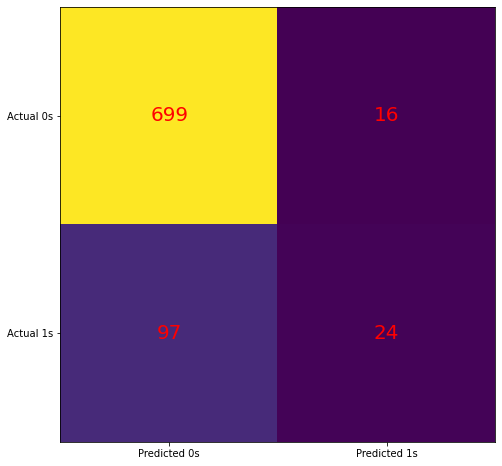

In [ ]:
cm = confusion_matrix(y_test, logr.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', size=20)
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
dt_result = pd.DataFrame(dtree.predict(x_test))


In [ ]:
dtree_score = dtree.score(x_test, y_test)
dtree_score

0.9198564593301436

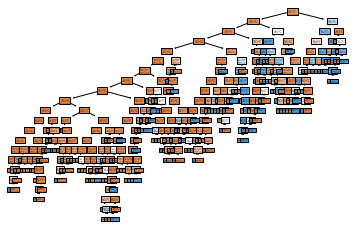

In [ ]:
tree.plot_tree(dtree,
               filled = True);

In [ ]:
tree.export_graphviz(dtree,
                     out_file="tree.dot",
                     filled = True)

In [ ]:
import os
os.system('dot -Tpng tree.dot -o tree.png')

0

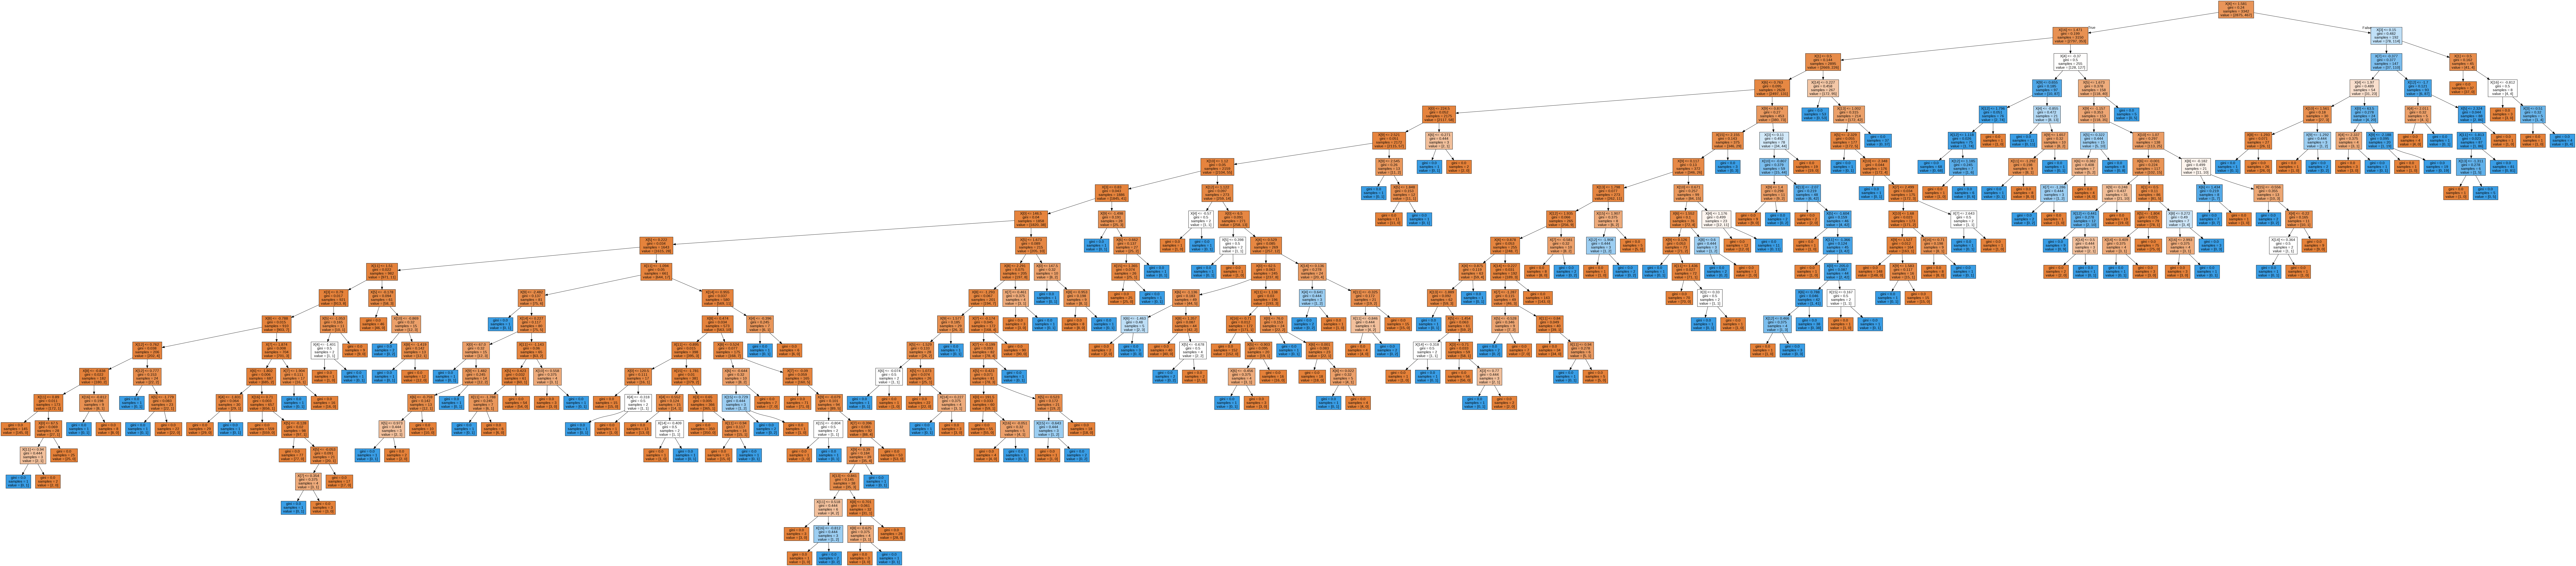

In [ ]:
from IPython import display
display.Image("/content/tree.png")

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dtree.predict(x_test))


array([[685,  30],
       [ 37,  84]])

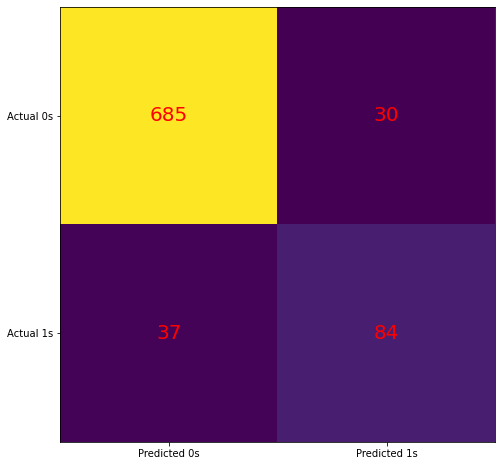

In [ ]:
cm = confusion_matrix(y_test, dtree.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', size = 20)
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
rfc_score = rfc.score(x_test, y_test)
rfc_score

0.9533492822966507

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc.predict(x_test))


array([[713,   2],
       [ 37,  84]])

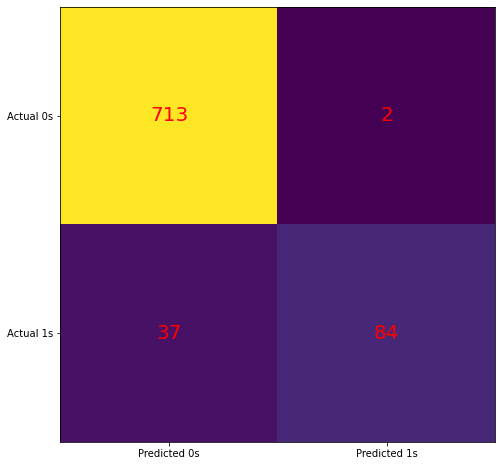

In [ ]:
cm = confusion_matrix(y_test, rfc.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', size = 20)
plt.show()

# 5. Models Comparison

In [ ]:
models_comparison = [['Logistic Regression', LogReg_score],['Decision Tree', dtree_score], ['Random Forest', rfc_score]]
  
final_result = pd.DataFrame(models_comparison, columns=['Model', 'Score'])
final_result

,Model,Score
0,Logistic Regression,0.864833
1,Decision Tree,0.919856
2,Random Forest,0.953349


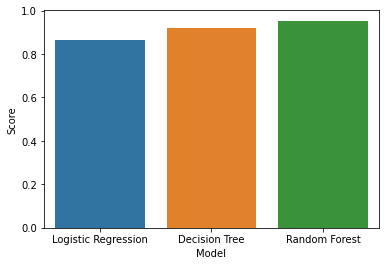

In [ ]:
sns.barplot(data= final_result, 
            x="Model", 
            y="Score")
 
plt.show()

Model Classification menggunakan Random Forest memberikan hasil Score paling besar dibandingkan Logistic Regression dan Decision Tree pada dataset Customer Churn yang sudah dibersihkan